### linear regression in 1 variable
https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## dummy data
size = 100
xs = np.stack([np.ones(size,), np.random.normal(size=(size,))]).T
noise = np.random.normal(scale=0.3, size=(size,))
# intercept, slope
theta = np.array([3, 10]).astype(np.float32)  #@param

ys = np.dot(xs, theta) + noise

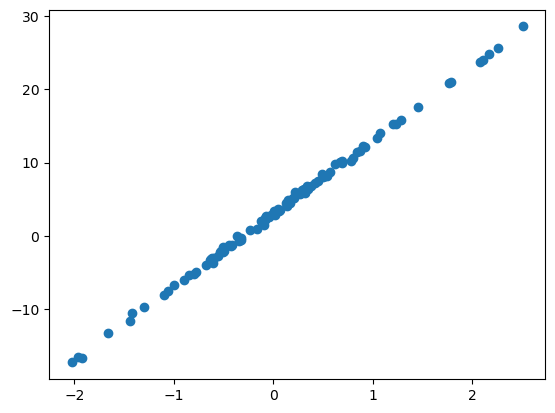

In [4]:
plt.scatter(xs[:, 1], ys)

In [5]:
params = {
    'theta': theta
}
data = {'x': xs, 'y': ys}

In [6]:
## model function
def model(params, x):
    y = jnp.dot(x, params['theta'])
    return y

In [7]:
## loss function
def sum_squared_error(params, x, y):
    preds = model(params, x)
    return jnp.mean((y - preds) ** 2), preds


def update(params, grads, lr=0.1):
    return {
        'theta': params['theta'] - lr * grads['theta']
    }

In [8]:
## training loop
# initial estimates
params = {
    'theta': jnp.array([0, 0], dtype=jnp.float32)
}

# hyperparmeters
max_steps = 100
eps = 1e-4

step = 0

# until we reach max_steps or the loss doesn't change by <eps>
while step < max_steps:
    # compute model value and grad
    (loss, preds), grads = jax.value_and_grad(sum_squared_error, has_aux=True)(params, xs, ys)


    print(loss, params)
    print(grads)
    params_ = update(params, grads)
    print(params_)

    if jnp.mean(jnp.abs(params['theta'] - params_['theta'])) < eps:
        break
    params = params_
    step += 1
    # # check diff 
    # prev_loss, diff = loss, jnp.abs(prev_loss - loss)

I0000 00:00:1704249567.822989       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


95.67902 {'theta': Array([0., 0.], dtype=float32)}
{'theta': Array([ -7.7747893, -16.746561 ], dtype=float32)}
{'theta': Array([0.77747893, 1.6746562 ], dtype=float32)}
64.688416 {'theta': Array([0.77747893, 1.6746562 ], dtype=float32)}
{'theta': Array([ -5.9383984, -13.898239 ], dtype=float32)}
{'theta': Array([1.3713188, 3.06448  ], dtype=float32)}
43.904514 {'theta': Array([1.3713188, 3.06448  ], dtype=float32)}
{'theta': Array([ -4.5171514, -11.54301  ], dtype=float32)}
{'theta': Array([1.8230339, 4.218781 ], dtype=float32)}
29.912748 {'theta': Array([1.8230339, 4.218781 ], dtype=float32)}
{'theta': Array([-3.4197354, -9.593876 ], dtype=float32)}
{'theta': Array([2.1650076, 5.178169 ], dtype=float32)}
20.45796 {'theta': Array([2.1650076, 5.178169 ], dtype=float32)}
{'theta': Array([-2.574558, -7.979494], dtype=float32)}
{'theta': Array([2.4224634, 5.976118 ], dtype=float32)}
14.045344 {'theta': Array([2.4224634, 5.976118 ], dtype=float32)}
{'theta': Array([-1.9255469, -6.6413026], 

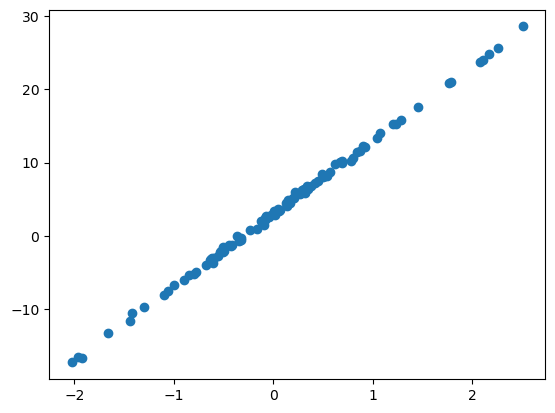

In [9]:
plt.scatter(xs[:,1], ys)

In [10]:
preds

Array([  5.011773  ,   9.950649  ,  11.468866  ,  -2.8643634 ,
        -4.7280703 ,  28.120071  ,   3.1799996 ,   1.9722625 ,
        20.91481   ,   0.7542328 ,  15.913451  ,   2.1398826 ,
         4.6998324 ,  17.565426  ,  -3.7386916 ,  23.792915  ,
        -1.1763389 ,   4.3474956 ,   2.7817822 , -11.367694  ,
        -7.5206437 , -13.560707  ,   3.5851429 ,   2.6254723 ,
        -2.4720259 ,  25.643703  ,  -1.4161645 ,  -3.1627755 ,
         5.9820366 , -17.23104   , -11.127641  , -16.566423  ,
         6.4774356 ,  15.137317  ,   5.160667  ,  -1.8865829 ,
         1.4002889 ,  -5.975161  ,   6.891036  ,  -0.2132314 ,
         2.3155441 ,  -6.9223022 ,   6.5658236 ,   4.52588   ,
        10.86635   ,   6.358028  ,   3.1379297 ,   9.74672   ,
        -1.1435603 ,  15.368155  ,   6.2229304 ,  -7.9846563 ,
         8.089964  ,  -9.913124  ,  12.299455  ,  24.14232   ,
        -2.2708495 ,  -0.3814396 , -16.22014   ,  11.071951  ,
         6.185633  ,   8.770357  ,   2.3502975 ,   7.55

In [11]:
grads

{'theta': Array([ 0.00044002, -0.00129545], dtype=float32)}

In [12]:
theta

array([ 3., 10.], dtype=float32)

In [13]:
params

{'theta': Array([ 3.047081, 10.003085], dtype=float32)}